In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [19]:
from utils.helper import  load_and_summarize,split_data,evaluate_regressor

In [20]:
df_hw =  load_and_summarize('CSV Files/Training_set_heights200.csv')

--- Loading Training_set_heights200.csv ---
First 5 rows:
   Height  Weight
0   147.5    66.0
1   137.9    64.2
2   149.7    70.3
3   162.8    74.1
4   136.5    54.1

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  200 non-null    float64
 1   Weight  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [21]:
X_train, X_test, y_train, y_test = split_data(df_hw, target_column='Height')

In [22]:
print("--- Model Comparison ---")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)

evaluate_regressor(y_test, y_linear_pred, model_name="Simple Linear Regression")

--- Model Comparison ---
MSE for Simple Linear Regression: 121.1958


In [23]:
degree = 3
poly_reg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg_model.fit(X_train, y_train)
y_poly_pred = poly_reg_model.predict(X_test)

evaluate_regressor(y_test, y_poly_pred, model_name=f"Polynomial Regression (Degree {degree})")

MSE for Polynomial Regression (Degree 3): 120.5599


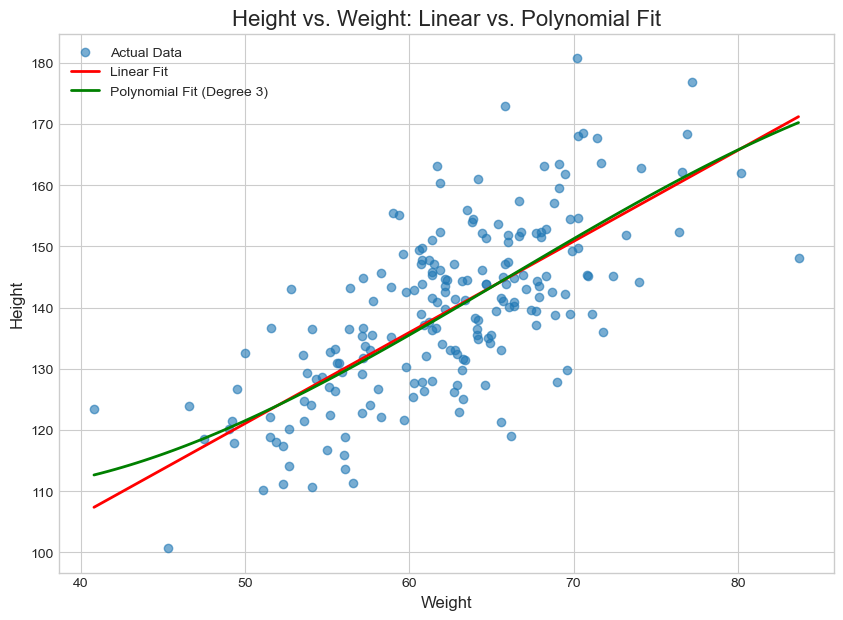

In [24]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 7))

# Scatter plot of the actual data points
plt.scatter(df_hw['Weight'], df_hw['Height'], alpha=0.6, label='Actual Data')

# Create a smooth range of X values for plotting
X_range_numpy = np.linspace(df_hw['Weight'].min(), df_hw['Weight'].max(), 100).reshape(-1, 1)

# **FIX:** Convert the numpy array to a DataFrame with the correct feature name
X_range_df = pd.DataFrame(X_range_numpy, columns=['Weight'])

# Plot the simple linear regression line
plt.plot(X_range_df, linear_model.predict(X_range_df), color='red', linewidth=2, label='Linear Fit')

# Plot the polynomial regression curve
plt.plot(X_range_df, poly_reg_model.predict(X_range_df), color='green', linewidth=2, label=f'Polynomial Fit (Degree {degree})')

plt.title('Height vs. Weight: Linear vs. Polynomial Fit', fontsize=16)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Height', fontsize=12)
plt.legend()
plt.show()